In [24]:
from keras import models
from keras import layers
from keras.datasets import reuters
#reuters dataset for training and testing
from keras.utils.np_utils import to_categorical
from keras.backend import categorical_crossentropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from keras.models import Model

In [4]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
# print(len(train_data),len(test_data))
# print(len(train_labels),len(test_labels))

df1=pd.DataFrame(train_data)
df1

,0
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ..."
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,..."
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,..."
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46..."
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2..."
...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363..."
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4..."
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ..."
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ..."


In [6]:
x=list([1,2,3,0,4])

In [7]:
r=np.zeros(len(x))
for i ,s in enumerate(x):
  r[i]=1


In [8]:

network=models.Sequential()
network.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(46,activation='softmax'))
#relu fn for maximum output


In [9]:

network.compile(optimizer='rmsprop',loss=categorical_crossentropy,metrics=['accuracy'])

In [10]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [11]:
# fn to convert dataset in numpy array so it will feed to network
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  print(results.shape)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(8982, 10000)
(2246, 10000)


In [13]:
#built in way to convert dataset into to one hot encoding 
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)
print(one_hot_train_labels.shape)
print(one_hot_train_labels.shape)


(8982, 46)
(8982, 46)


In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history=network.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/10
16/16 [==============================] - 2s 63ms/step - loss: 2.6281 - accuracy: 0.4929 - val_loss: 1.7369 - val_accuracy: 0.6300
Epoch 2/10
16/16 [==============================] - 1s 49ms/step - loss: 1.4081 - accuracy: 0.7062 - val_loss: 1.2855 - val_accuracy: 0.7230
Epoch 3/10
16/16 [==============================] - 1s 47ms/step - loss: 1.0312 - accuracy: 0.7830 - val_loss: 1.1202 - val_accuracy: 0.7650
Epoch 4/10
16/16 [==============================] - 1s 49ms/step - loss: 0.8043 - accuracy: 0.8310 - val_loss: 1.0161 - val_accuracy: 0.7910
Epoch 5/10
16/16 [==============================] - 1s 47ms/step - loss: 0.6413 - accuracy: 0.8677 - val_loss: 0.9802 - val_accuracy: 0.7930
Epoch 6/10
16/16 [==============================] - 1s 48ms/step - loss: 0.5085 - accuracy: 0.8963 - val_loss: 0.9151 - val_accuracy: 0.8090
Epoch 7/10
16/16 [==============================] - 1s 47ms/step - loss: 0.4084 - accuracy: 0.9171 - val_loss: 0.9254 - val_accuracy: 0.8080
Epoch 8/10
16

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print(loss)
print(val_loss)

[2.541018009185791, 1.3725075721740723, 1.0236698389053345, 0.8096528053283691, 0.6489364504814148, 0.522860050201416, 0.4177232086658478, 0.3457637429237366, 0.2856306731700897, 0.2415054589509964]
[1.6964181661605835, 1.3283628225326538, 1.138674020767212, 1.0371688604354858, 0.9813781976699829, 0.9389790296554565, 0.9455946087837219, 0.9022064208984375, 0.9827287793159485, 0.9080370664596558]


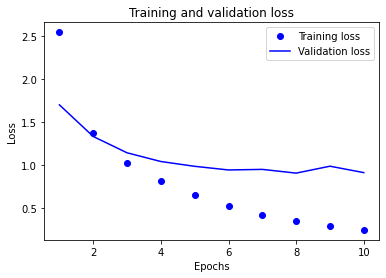

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

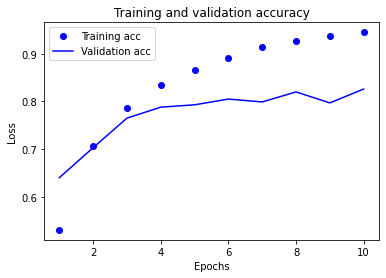

In [22]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19634906500445237

In [35]:
predictions=network.predict(x_test)
predictions.shape

(2246, 46)

In [36]:
np.sum(predictions[0])

0.9999999

In [46]:
np.argmax(predictions[1])
#The largest entry is the predicted class—the class with the highest probability:

4